In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft, interpolate
import math
from cmath import exp, pi

In [2]:
# iterative cooley tukey fft
def cooley_tukey_fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd, X_even - terms * X_odd])
    
    return X.ravel()

# recursive iteration fft
def recursive_fft(x):
    N = len(x)
    if N <= 1: return x
    even = recursive_fft(x[0::2])
    odd =  recursive_fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

# read raw data
def read_data(filename):
    result = []  
    with open(filename,'r') as file:  
        csvReader=csv.reader(file)  
        for line in csvReader:
            result.append(float(line[0]))
    return result

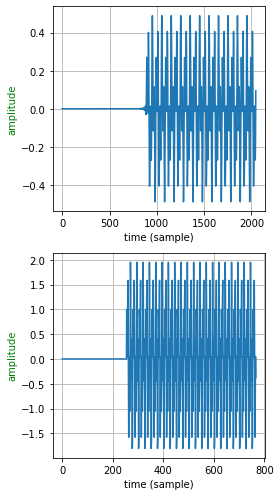

In [3]:
dataSet1 = read_data("Interpolation_Data/expectedinterpoutput2048.dat")
x_axis1 = np.arange(len(dataSet1))

dataSet2 = read_data("Interpolation_Data/indata512.dat")
x_axis2 = np.arange(len(dataSet2))

fig, axes = plt.subplots(2, 1, figsize=(4, 7))

axes[0].plot(x_axis1, dataSet1)
axes[0].set_xlabel('time (sample)')
axes[0].set_ylabel('amplitude', color='g')
axes[0].grid()

axes[1].plot(x_axis2, dataSet2)
axes[1].set_xlabel('time (sample)')
axes[1].set_ylabel('amplitude', color='g')
axes[1].grid()

plt.tight_layout()
plt.show()

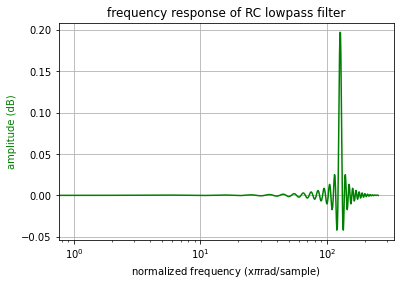

In [4]:
dataSet = read_data("Interpolation_Data/coeffs256.dat")
x_axis = np.arange(len(dataSet))

fig, ax1 = plt.subplots()

ax1.plot(x_axis, dataSet, 'g')
ax1.set_xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

plt.title('frequency response of RC lowpass filter')
plt.xscale("log")
plt.show()

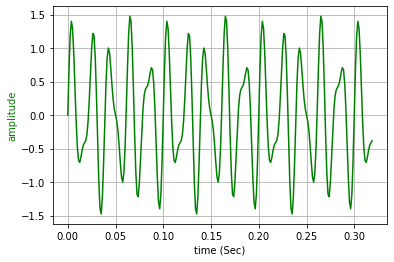

In [5]:
# Number of sample points
N = 256
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

fig, ax1 = plt.subplots()

ax1.plot(x, y, 'g')
ax1.set_xlabel(r'time (Sec)')
ax1.set_ylabel('amplitude', color='g')
ax1.grid()
plt.show()

C:\Users\Lava.kweiwen\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Lava.kweiwen\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


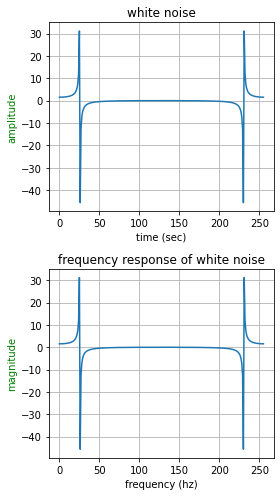

In [6]:
yy1 = recursive_fft(y)
yy1 = np.array(yy1)
xy1 = np.arange(len(yy1))
half = len(yy1) // 2

yy2 = cooley_tukey_fft(y)
xy2 = np.arange(len(yy2))
half = len(yy2) // 2

fig, axes = plt.subplots(2, 1, figsize=(4, 7))

axes[0].plot(xy1, yy1)
axes[0].set_xlabel('time (sec)')
axes[0].set_ylabel('amplitude', color='g')
axes[0].set_title('white noise')
axes[0].grid()

axes[1].plot(xy2, yy2)
axes[1].set_title('frequency response of white noise')
axes[1].set_xlabel('frequency (hz)')
axes[1].set_ylabel('magnitude', color='g')
axes[1].grid()

plt.tight_layout()
plt.show()